# Especialización en Analítica y Ciencia de Datos
### Monografía
### Gestión de datos

## _Clasificación de la desnutrición e inseguridad alimentaria en población infantil de los hogares del departamento de Antioquia, Colombia: un enfoque utilizando aprendizaje automático._

**Autores**\
Huberth Rolando Hincapié Arango\
Yeisson Alejandro Gutiérrez Cano

In [ ]:
# Datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt

# Matemáticas y estadísticas
# ==============================================================================
import math
from collections import Counter

# Exportar datos
# ==============================================================================
from google.colab import files



#**Importación de datos -- O1**

In [ ]:
!gdown '1btnrXkAyxGJAnpvuck7KUQRD3TaphW6k' -O /tmp/DataO1_Scaled.csv

Downloading...
From: https://drive.google.com/uc?id=1btnrXkAyxGJAnpvuck7KUQRD3TaphW6k
To: /tmp/DataO1_Scaled.csv
100% 973k/973k [00:00<00:00, 9.04MB/s]


In [ ]:
dataO1_scaled = pd.read_csv('/tmp/DataO1_Scaled.csv', encoding='ISO-8859-1', sep=',')
dataO1_scaled.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V78,V79,V80,V81,V82,V84,V90,V92,V95,O1_bins
0,-0.567282,-0.873081,-1.847497,-0.204880,-0.892724,1.475546,2.168902,3.852858,0.339925,4.212196,...,-1.232199e-16,0.195550,0.941107,-0.257090,0.059075,3.069361,-0.170833,2.019021,-0.262803,Alto
1,0.016116,0.132548,-1.980304,-0.204880,-0.512116,1.337785,2.039708,3.147752,0.339925,4.320948,...,3.570810e-01,0.044022,0.812805,-0.183989,0.048226,1.941384,0.281870,2.088402,-0.320349,Alto
2,0.000079,-0.945855,-2.100248,-0.199023,-0.546916,1.263779,2.106107,3.724573,0.339925,4.187944,...,3.848276e-01,0.129237,0.786415,-0.345679,0.104943,2.029038,1.538084,2.195077,-0.172509,Alto
3,0.016116,0.132548,-2.395315,-0.199023,0.292763,1.131532,2.095081,3.630436,0.339925,4.091743,...,3.293343e-01,-0.047633,0.606618,-0.100394,-0.023629,1.937679,2.988249,2.189546,-0.225743,Moderado
4,-0.247730,-0.906843,-2.548677,-0.199023,0.963712,1.063575,2.084738,3.532341,0.339925,4.326914,...,-1.232199e-16,-0.099282,0.750207,-0.146720,0.168295,2.142751,5.473188,2.461030,-0.240791,Alto


In [ ]:
dataO1_scaled.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V77,V78,V79,V80,V81,V82,V84,V90,V92,V95
count,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,...,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02
mean,5.092223e-17,-2.510584e-16,2.842171e-17,3.315866e-17,2.865856e-16,-4.500104e-17,7.815970e-17,-9.473903e-18,-8.692306e-16,7.579123e-17,...,4.736952e-17,-9.473903e-17,-6.868580e-17,-2.842171e-17,-5.684342e-17,-3.789561e-17,5.210647e-17,2.131628e-17,-2.842171e-17,2.723747e-17
std,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,...,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00
min,-9.734393e+00,-1.164416e+00,-4.455616e+00,-2.460574e-01,-1.316577e+00,-6.328511e-01,-2.429393e+00,-7.192554e-01,-1.262537e+01,-3.601771e-01,...,-4.260589e-01,-4.753187e-01,-8.825472e-01,-1.401856e+00,-7.413093e-01,-2.134714e+00,-2.791226e-01,-3.690639e-01,-9.691222e-01,-3.849812e-01
25%,1.611562e-02,-3.684149e-01,-4.801251e-01,-2.460574e-01,-7.783744e-01,-4.307013e-01,-5.348956e-01,-7.192554e-01,-8.120592e-02,-3.601771e-01,...,-4.260589e-01,-4.753187e-01,-8.825472e-01,-5.896932e-01,-7.413093e-01,-6.646605e-01,-2.791226e-01,-3.690639e-01,-6.712080e-01,-3.849812e-01
50%,1.611562e-02,1.325477e-01,-2.348027e-02,-2.460574e-01,-2.389565e-01,-2.726282e-01,-1.924208e-01,-2.751397e-01,3.399254e-01,-3.601771e-01,...,-4.260589e-01,-1.232199e-16,-2.413316e-01,-8.670324e-02,-3.149191e-01,-1.117531e-01,-2.791226e-01,-3.690639e-01,-4.148190e-01,-2.866797e-01
75%,1.180772e-01,1.325477e-01,4.100837e-01,-2.284855e-01,4.923798e-01,-9.938468e-02,6.538124e-01,1.067842e-01,3.399254e-01,-2.767577e-01,...,-5.648040e-02,-1.232199e-16,4.436761e-01,4.965202e-01,4.115142e-01,5.530586e-01,-2.791226e-01,-1.278224e-01,4.195963e-01,1.914971e-01
max,3.265572e+00,1.429123e+01,6.008906e+00,8.346037e+00,6.494087e+00,7.760915e+00,2.170516e+00,3.867624e+00,3.399254e-01,7.707683e+00,...,8.353610e+00,1.615880e+01,5.772004e+00,5.655819e+00,7.297662e+00,4.661438e+00,8.111877e+00,1.225007e+01,5.670521e+00,1.146633e+01


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear un LabelEncoder
le = LabelEncoder()

#Separar variables de entrada y de salida
X = dataO1_scaled.drop(['O1_bins'], axis=1)
y = le.fit_transform(dataO1_scaled['O1_bins'])
X.shape, y.shape

((750, 67), (750,))

In [ ]:
#split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=47)

# **RandomForest Classifier**: tunning 1 -- O1

```
# Tiene formato de código
```



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Inicializar el clasificador Random Forest
rfc = RandomForestClassifier(random_state=123)

params_rf = {
    'n_estimators': [100, 200],  # More options for number of trees
    'max_depth': [10, 20],  # Include None to allow the tree to grow until all leaves are pure
    'min_samples_split': [2, 5, 10],  # Start from 2 as 1 is not a valid option
    'min_samples_leaf': [1, 2, 4],  # Include lower values
    'max_features': ['auto', 'sqrt', 'log2'],  # Include different strategies for selecting features
    'bootstrap': [False, True],  # As determined by PyCaret
    'criterion': ['gini', 'entropy'],  # Different impurity criteria
    'random_state': [135]  # Fixing the random state for reproducibility
}
#Resultados:4:43 min
#Fitting 10 folds for each of 432 candidates, totalling 4320 fits
#Mejor Precisión en conjunto de prueba: 0.65
#Mejores parámetros encontrados por GridSearchCV:
#{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2',
# 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 135}

params_rf2 = {
    'n_estimators': [100, 200],  # More options for number of trees
    'max_depth': [10, 20, 25, 30],  # Include None to allow the tree to grow until all leaves are pure
    'min_samples_split': [2, 4, 5, 7, 10],  # Start from 2 as 1 is not a valid option
    'min_samples_leaf': [1, 2, 4],  # Include lower values
    'max_features': ['auto', 'sqrt', 'log2'],  # Include different strategies for selecting features
    'bootstrap': [False, True],  # As determined by PyCaret
    'criterion': ['gini', 'entropy'],  # Different impurity criteria
    'random_state': [135]  # Fixing the random state for reproducibility
}
#Resultados:18:29 min
#Fitting 10 folds for each of 1440 candidates, totalling 14400 fits
#Mejor Precisión en conjunto de prueba: 0.65
#Mejores parámetros encontrados por GridSearchCV:
#{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2',
# 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 135}

#Otro Escenario: 2min33s
#Fitting 5 folds for each of 432 candidates, totalling 2160 fits
#Mejor Precisión en conjunto de prueba: 0.57
#Mejores parámetros encontrados por GridSearchCV:
#{'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2',
# 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 135}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=params_rf,
                           cv=5, n_jobs=-1, verbose=3, scoring='accuracy')

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Mejor Precisión en conjunto de prueba: {accuracy:.2f}')

# Mostrar los mejores parámetros
print('Mejores parámetros encontrados por GridSearchCV:')
print(grid_search.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Mejor Precisión en conjunto de prueba: 0.57
Mejores parámetros encontrados por GridSearchCV:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 135}


**Gráficas Random Forest Clasifier - GridSearch**

Matriz de confusión:

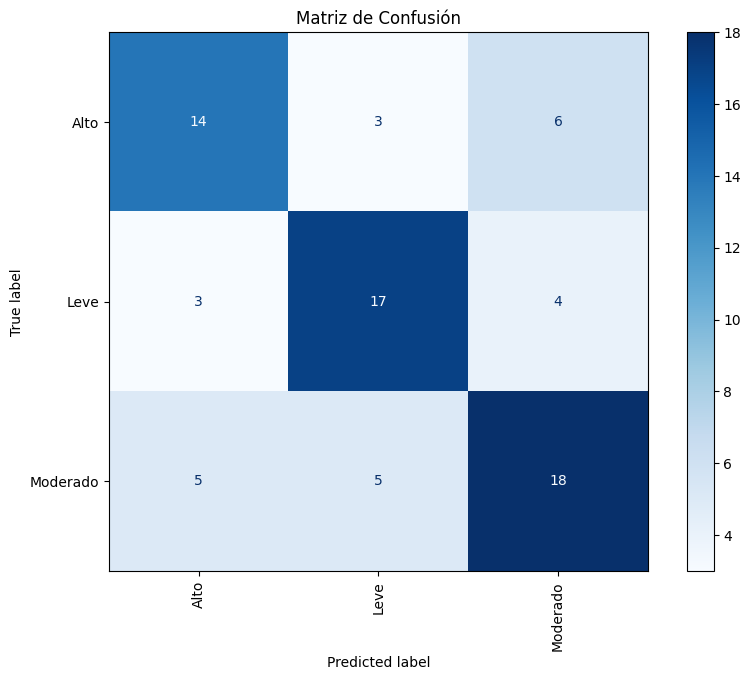

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Personalizar la visualización para quitar la grilla
fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
ax.grid(False)  # Quitar la grilla

# Añadir título y mostrar la gráfica
plt.title('Matriz de Confusión')
plt.show()

Curva ROC

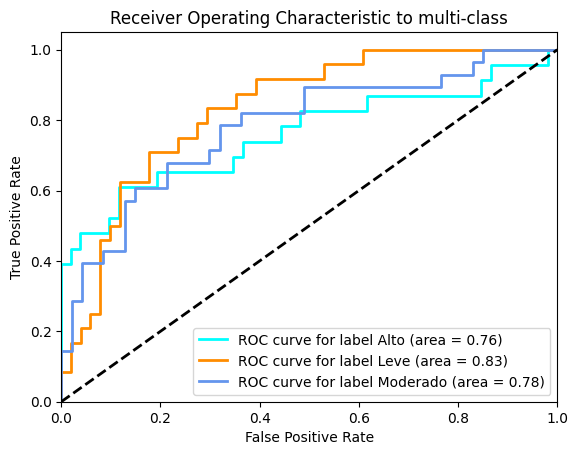

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Binarizar las etiquetas para la curva ROC multiclase
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Ajusta según el número de clases

# Ajustar el clasificador con OneVsRest para obtener curvas ROC por clase
classifier = OneVsRestClassifier(make_pipeline(StandardScaler(), grid_search.best_estimator_))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Calcular y dibujar las curvas ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']  # Define colores para cada clase

for i, color in zip(range(y_test_bin.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for label {le.inverse_transform([i])[0]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



Reporte de Clasificación:

In [ ]:
from sklearn.metrics import classification_report

# Generar y mostrar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=le.classes_)
print(report)


              precision    recall  f1-score   support

        Alto       0.64      0.61      0.62        23
        Leve       0.68      0.71      0.69        24
    Moderado       0.64      0.64      0.64        28

    accuracy                           0.65        75
   macro avg       0.65      0.65      0.65        75
weighted avg       0.65      0.65      0.65        75



Importancia de características

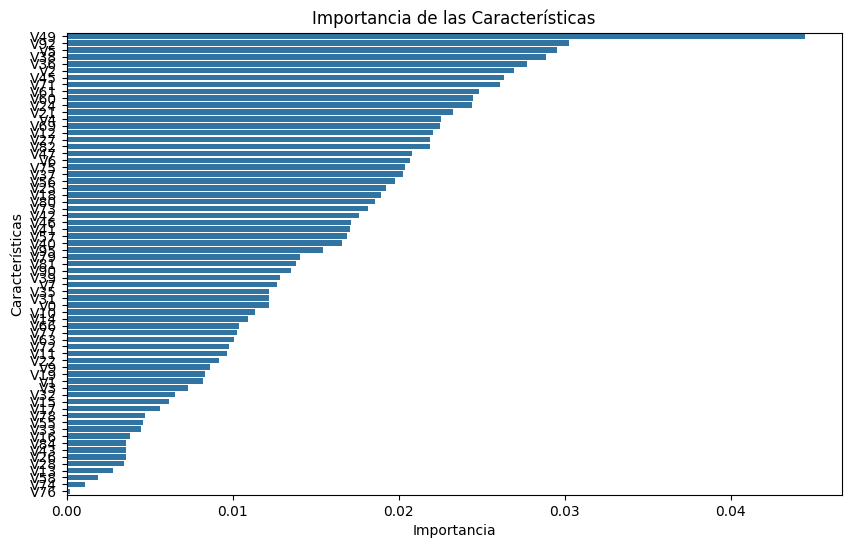

In [ ]:
import pandas as pd
import seaborn as sns

# Extraer la importancia de características
importances = grid_search.best_estimator_.feature_importances_
features = X_train.columns
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})

# Ordenar por importancia
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


Visualización del Árbol

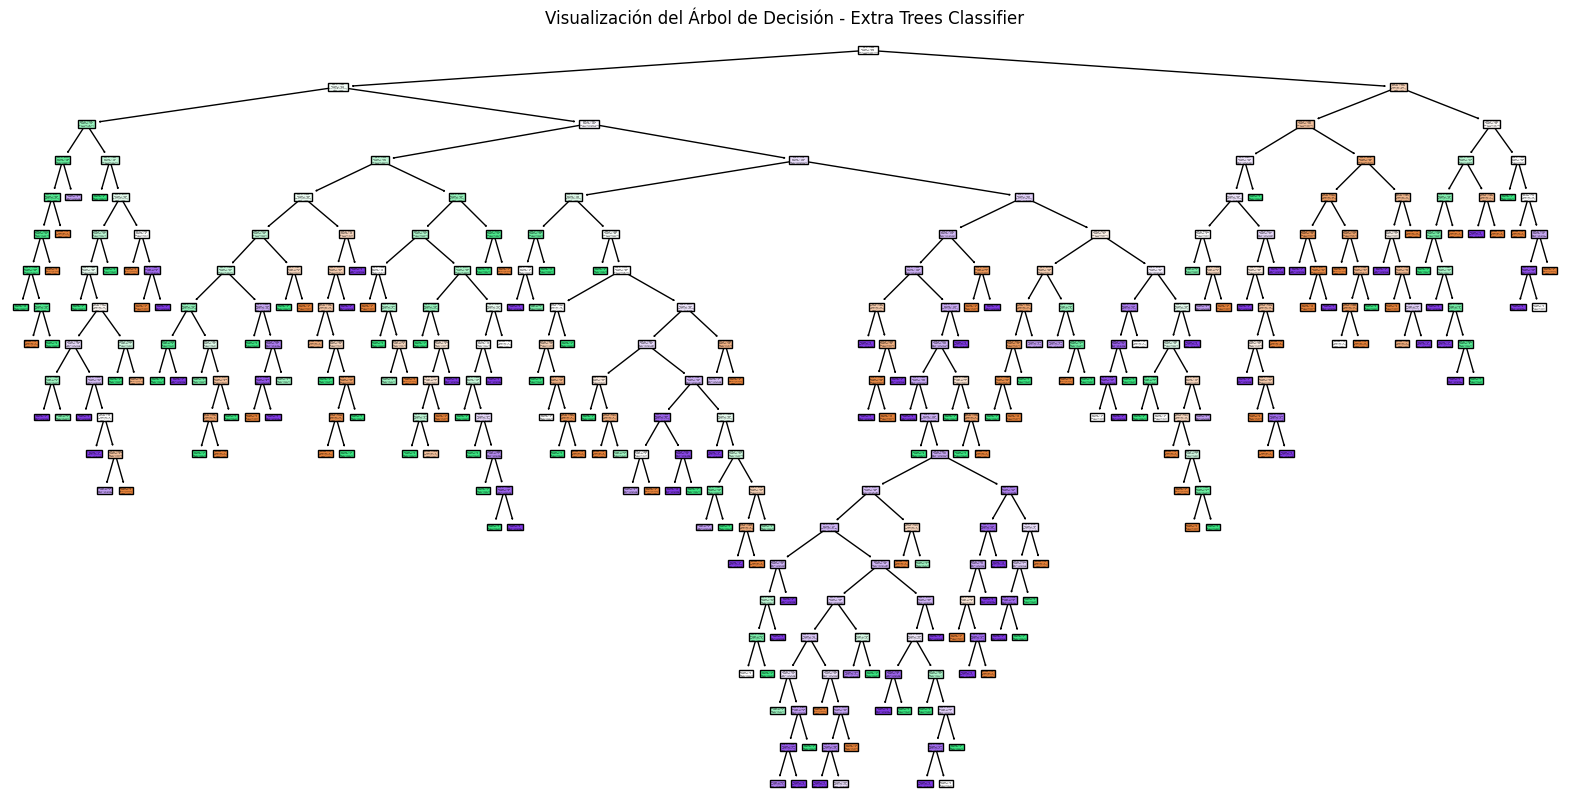

In [ ]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Extraer uno de los árboles del mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_
one_tree = best_model.estimators_[0]  # Extraer el primer árbol del bosque

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(one_tree, feature_names=X_train.columns, class_names=le.classes_, filled=True)
plt.title('Visualización del Árbol de Decisión - Extra Trees Classifier')
plt.show()

#**Importación de datos -- O2**

In [ ]:
!gdown '1puNdTp4u_w041L1WP5-4jxaeQSnIm2TZ' -O /tmp/DataO2_Scaled.csv

Downloading...
From: https://drive.google.com/uc?id=1puNdTp4u_w041L1WP5-4jxaeQSnIm2TZ
To: /tmp/DataO2_Scaled.csv
100% 650k/650k [00:00<00:00, 153MB/s]


In [ ]:
dataO2_scaled = pd.read_csv('/tmp/DataO2_Scaled.csv', encoding='ISO-8859-1', sep=',')
dataO2_scaled.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V78,V79,V80,V81,V82,V84,V90,V92,V95,O2_bins
0,0.430354,0.009387,-1.381115,-0.197512,-0.777944,0.853830,1.923796,2.932286,0.367966,3.786260,...,0.027614,-0.020891,1.007666,-0.133295,-0.144473,2.457913,-0.251463,1.762165,-0.341267,Moderado
1,-0.434811,-0.444945,-1.906988,-0.197512,-0.491146,1.542798,1.986964,3.744359,0.367966,4.292930,...,0.027614,0.249008,1.077720,-0.254170,0.079917,3.365094,-0.003477,2.169206,-0.246322,Leve
2,-0.011952,-0.477144,-2.152264,-0.191600,-0.118030,1.304207,1.933046,3.621531,0.367966,4.267933,...,0.612624,0.179515,0.908835,-0.344063,0.125114,2.243470,2.356736,2.353465,-0.176155,Moderado
3,-0.196646,-0.459884,-2.587431,-0.191600,1.511889,1.078644,1.914698,3.437478,0.367966,4.411171,...,0.027614,-0.059961,0.869305,-0.142175,0.187539,2.366070,7.791570,2.631809,-0.229217,Alto
4,0.479827,-0.386916,0.776013,-0.221337,-0.981221,0.144047,-0.661775,-0.633246,0.215787,-0.104221,...,0.027614,-0.880781,0.704698,-0.138254,-0.714058,-0.245074,-0.277256,0.857175,-0.141883,Moderado


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear un LabelEncoder
le = LabelEncoder()

#Separar variables de entrada y de salida
X = dataO2_scaled.drop(['O2_bins'], axis=1)
y = le.fit_transform(dataO2_scaled['O2_bins'])
X.shape, y.shape

((500, 67), (500,))

In [ ]:
#split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=47)

# **RandomForest Classifier**: tunning 1 -- O2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Inicializar el clasificador Random Forest
rfc = RandomForestClassifier(random_state=123)

params_rf = {
    'n_estimators': [100, 200],  # More options for number of trees
    'max_depth': [10, 20],  # Include None to allow the tree to grow until all leaves are pure
    'min_samples_split': [2, 5, 10],  # Start from 2 as 1 is not a valid option
    'min_samples_leaf': [1, 2, 4],  # Include lower values
    'max_features': ['auto', 'sqrt', 'log2'],  # Include different strategies for selecting features
    'bootstrap': [False, True],  # As determined by PyCaret
    'criterion': ['gini', 'entropy'],  # Different impurity criteria
    'random_state': [135]  # Fixing the random state for reproducibility
}
#Resultados:3:59 min
# Fitting 10 folds for each of 432 candidates, totalling 4320 fits
#Mejor Precisión en conjunto de prueba: 0.56
#Mejores parámetros encontrados por GridSearchCV:
#{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto',
# 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 135}

params_rf2 = {
    'n_estimators': [80, 100, 120, 200],  # More options for number of trees
    'max_depth': [7, 10, 15],  # Include None to allow the tree to grow until all leaves are pure
    'min_samples_split': [2, 4, 5],  # Start from 2 as 1 is not a valid option
    'min_samples_leaf': [1, 2],  # Include lower values
    'max_features': ['auto', 'sqrt', 'log2'],  # Include different strategies for selecting features
    'bootstrap': [False, True],  # As determined by PyCaret
    'criterion': ['gini', 'entropy'],  # Different impurity criteria
    'random_state': [135]  # Fixing the random state for reproducibility
}
#Resultados: 0min 27seg
#Fitting 5 folds for each of 864 candidates, totalling 4320 fits
#Mejor Precisión en conjunto de prueba: 0.60
#Mejores parámetros encontrados por GridSearchCV:
#{'bootstrap': False, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2',
# 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80, 'random_state': 135}

params_rf3 = {
    'n_estimators': [50, 70, 80, 100],  # More options for number of trees
    'max_depth': [7, 10, 15, 17, 20],  # Include None to allow the tree to grow until all leaves are pure
    'min_samples_split': [2, 4, 5],  # Start from 2 as 1 is not a valid option
    'min_samples_leaf': [1, 2],  # Include lower values
    'max_features': ['auto', 'sqrt', 'log2'],  # Include different strategies for selecting features
    'bootstrap': [False, True],  # As determined by PyCaret
    'criterion': ['gini', 'entropy'],  # Different impurity criteria
    'random_state': [135]  # Fixing the random state for reproducibility
}
#Resultados: 29seg
#Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
#Mejor Precisión en conjunto de prueba: 0.60
#Mejores parámetros encontrados por GridSearchCV:
#{'bootstrap': False, 'criterion': 'gini', 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 2,
# 'min_samples_split': 2, 'n_estimators': 70, 'random_state': 135}

params_rf4 = {
    'n_estimators': [50, 65, 70, 75, 80],  # More options for number of trees
    'max_depth': [15, 16, 17, 18, 19],  # Include None to allow the tree to grow until all leaves are pure
    'min_samples_split': [2, 4, 5],  # Start from 2 as 1 is not a valid option
    'min_samples_leaf': [1, 2],  # Include lower values
    'max_features': ['auto', 'sqrt', 'log2'],  # Include different strategies for selecting features
    'bootstrap': [False, True],  # As determined by PyCaret
    'criterion': ['gini', 'entropy'],  # Different impurity criteria
    'random_state': [135]  # Fixing the random state for reproducibility
}
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=params_rf4,
                           cv=5, n_jobs=-1, verbose=3, scoring='accuracy')

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Mejor Precisión en conjunto de prueba: {accuracy:.2f}')

# Mostrar los mejores parámetros
print('Mejores parámetros encontrados por GridSearchCV:')
print(grid_search.best_params_)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
Mejor Precisión en conjunto de prueba: 0.60
Mejores parámetros encontrados por GridSearchCV:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 75, 'random_state': 135}


**Gráficas RandomForest Clasifier - GridSearch**

Matriz de confusión:

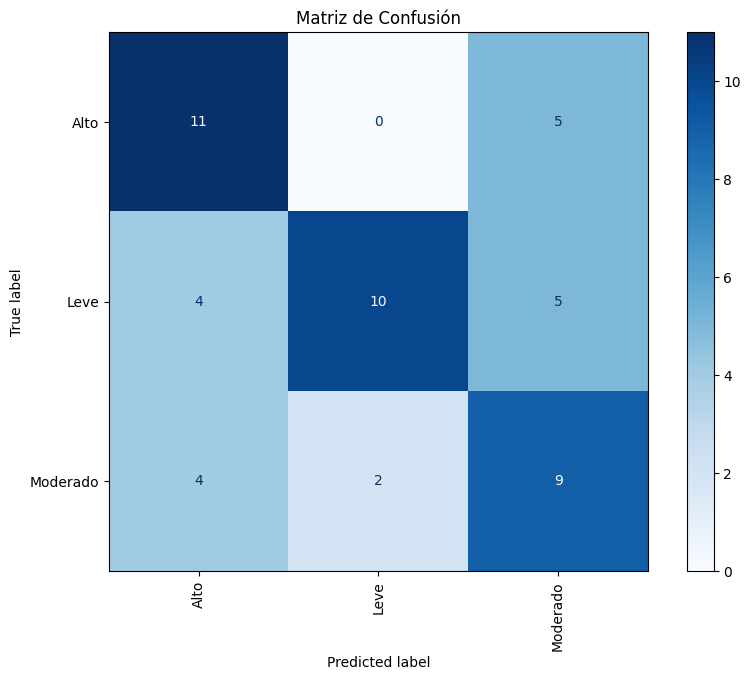

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Personalizar la visualización para quitar la grilla
fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
ax.grid(False)  # Quitar la grilla

# Añadir título y mostrar la gráfica
plt.title('Matriz de Confusión')
plt.show()

Curva ROC

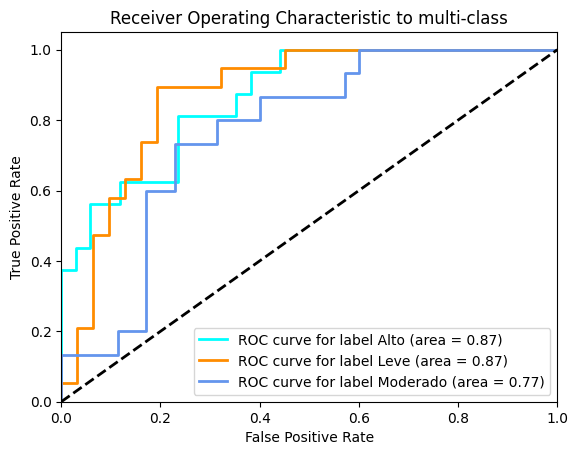

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Binarizar las etiquetas para la curva ROC multiclase
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Ajusta según el número de clases

# Ajustar el clasificador con OneVsRest para obtener curvas ROC por clase
classifier = OneVsRestClassifier(make_pipeline(StandardScaler(), grid_search.best_estimator_))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Calcular y dibujar las curvas ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']  # Define colores para cada clase

for i, color in zip(range(y_test_bin.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for label {le.inverse_transform([i])[0]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



Reporte de Clasificación:

In [ ]:
from sklearn.metrics import classification_report

# Generar y mostrar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=le.classes_)
print(report)


              precision    recall  f1-score   support

        Alto       0.58      0.69      0.63        16
        Leve       0.83      0.53      0.65        19
    Moderado       0.47      0.60      0.53        15

    accuracy                           0.60        50
   macro avg       0.63      0.60      0.60        50
weighted avg       0.64      0.60      0.61        50



Importancia de características

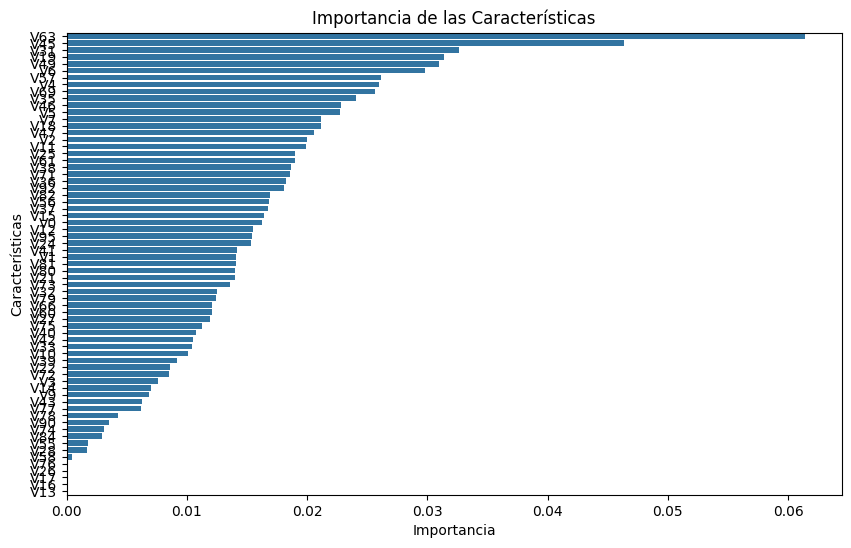

In [ ]:
import pandas as pd
import seaborn as sns

# Extraer la importancia de características
importances = grid_search.best_estimator_.feature_importances_
features = X_train.columns
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})

# Ordenar por importancia
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


Visualización del Árbol

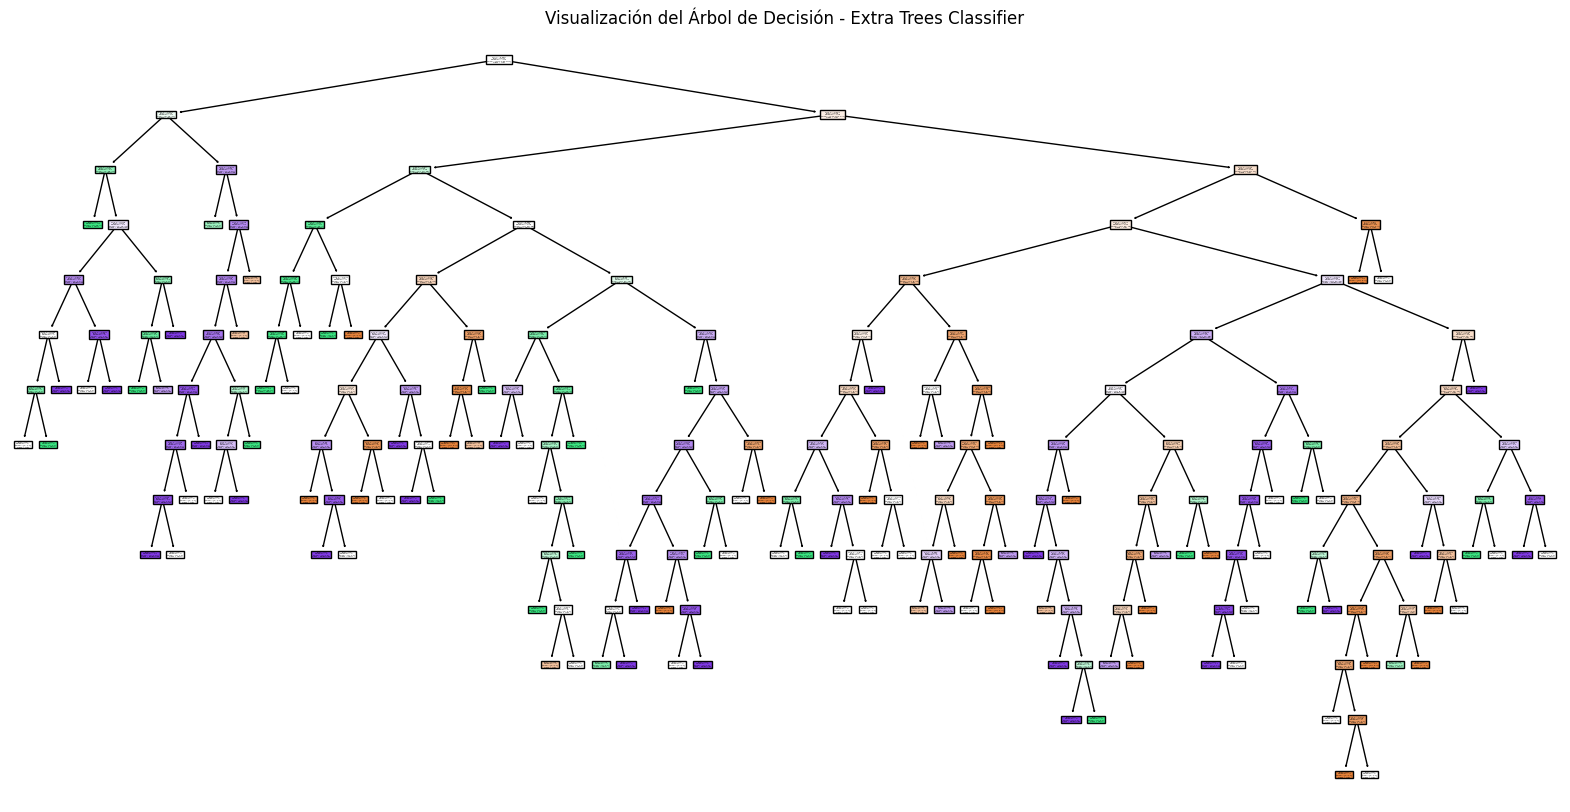

In [ ]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Extraer uno de los árboles del mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_
one_tree = best_model.estimators_[0]  # Extraer el primer árbol del bosque

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(one_tree, feature_names=X_train.columns, class_names=le.classes_, filled=True)
plt.title('Visualización del Árbol de Decisión - Extra Trees Classifier')
plt.show()